# Projeto de Filtros Analógicos

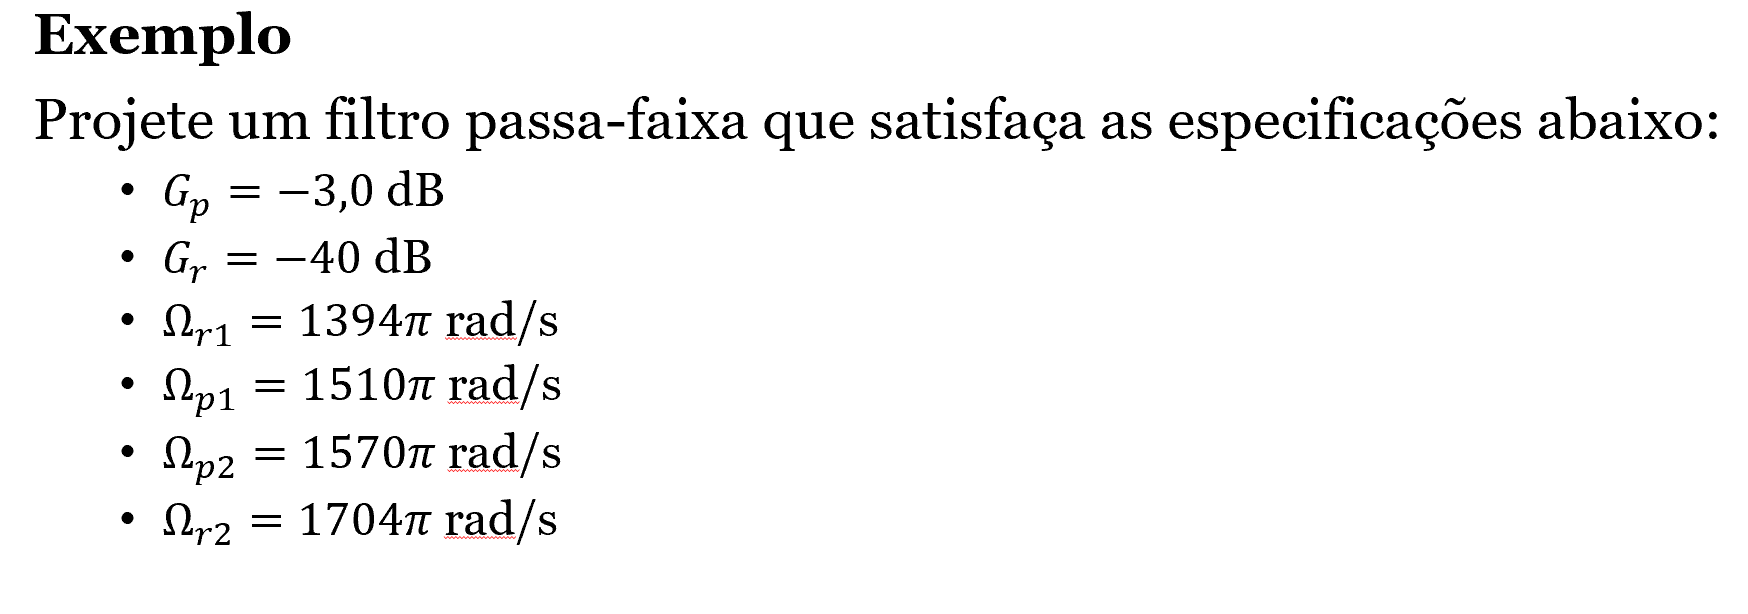

In [1]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy import signal # importa biblioteca de sinais
# Requisitos do filtro
Gp = -3 #dB
Gr = -40 #dB
wr1 = 1394*np.pi
wp1 = 1510*np.pi
wp2 = 1570*np.pi
wr2 = 1704*np.pi

Ap = -Gp
Ar = -Gr
dp = 1 - 10**(Gp/20)
dr = 10**(Gr/20)

In [3]:
# Determinar a ordem do filtro

wp = [wp1,wp2]
wr = [wr1,wr2]

n_butt, wn_butt = signal.buttord(wp=wp, ws=wr, gpass=Ap, gstop=Ar, analog=True)
n_cheb1, wn_cheb1 = signal.cheb1ord(wp=wp, ws=wr, gpass=Ap, gstop=Ar, analog=True)
n_cheb2, wn_cheb2 = signal.cheb2ord(wp=wp, ws=wr, gpass=Ap, gstop=Ar, analog=True)
n_ellip, wn_ellip = signal.ellipord(wp=wp, ws=wr, gpass=Ap, gstop=Ar, analog=True)

n_butt, n_cheb1, n_cheb2, n_ellip

(3, 3, 3, 2)

In [7]:
# Aproximações do filtro
b, a = signal.butter(N=n_butt, Wn=wn_butt,
              btype='bp', analog=True, output='ba', fs=None)
sys1 = signal.lti(b,a)
b, a = signal.cheby1(N=n_cheb1, rp=Ap, Wn=wn_cheb1,
              btype='bp', analog=True, output='ba', fs=None)
sys2 = signal.lti(b,a)
b, a = signal.cheby2(N=n_cheb2, rs=Ar, Wn=wn_cheb2,
              btype='bp', analog=True, output='ba', fs=None)
sys3 = signal.lti(b,a)
b, a = signal.ellip(N=n_ellip, rp=Ap, rs=Ar, Wn=wn_ellip,
              btype='bp', analog=True, output='ba', fs=None)
sys4 = signal.lti(b,a)

In [33]:
%matplotlib inline

(4329.380159104172, 5403.2738817170075)

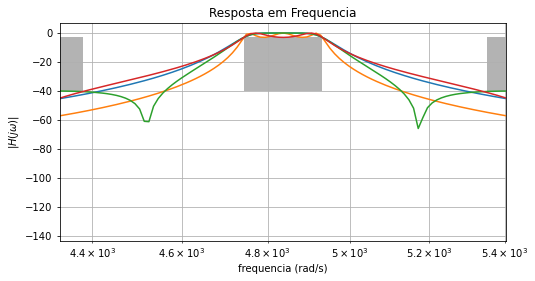

In [39]:
# diagrama de Bode
w = np.logspace(3,4,1000)
w, mag1, pha1 = signal.bode(sys1, w)
w, mag2, pha2 = signal.bode(sys2, w)
w, mag3, pha3 = signal.bode(sys3, w)
w, mag4, pha4 = signal.bode(sys4, w)

plt.figure(figsize=(8,4))
plt.semilogx(w, mag1)
plt.semilogx(w, mag2)
plt.semilogx(w, mag3)
plt.semilogx(w, mag4)

plt.fill([min(w),min(w),wr1,wr1],[Gr,Gp,Gp,Gr],".7")
plt.fill([wp1,wp1,wp2,wp2],[Gr,Gp,Gp,Gr],".7")
plt.fill([wr2,wr2,max(w),max(w)],[Gr,Gp,Gp,Gr],".7")

plt.title('Resposta em Frequencia')
plt.grid(which="both")
plt.xlabel('frequencia (rad/s)');
plt.ylabel('$|H(j\omega)|$');
plt.xlim(wr1-50,wr2+50)

# plt.figure(figsize=(8,2))
# plt.semilogx(w, pha)
# plt.grid(1)
# plt.xlabel('frequencia (rad/s)');
# plt.ylabel('$\measuredangle H(j\omega)$');